### Air-sea flux

- regional pco2 and monthly pco2 means
- air-sea flux by region

In [1]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
# import pipvis as vp
from importlib import reload
from salishsea_tools import (
viz_tools)
import arrow


In [2]:
tcl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/BIO_clno_5_2015_reass.pkl'
xs_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Xcoords_for571_stations.pkl'
ys_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Ycoords_for571_stations.pkl'

cldes = pickle.load(open(tcl, 'rb'))
xs = pickle.load(open(xs_pkl, 'rb'))
ys = pickle.load(open(ys_pkl, 'rb'))

ys_csog = ys[cldes == 3]
xs_csog = xs[cldes == 3]

ys_nsog = ys[cldes == 4]
xs_nsog = xs[cldes == 4]

ys_jdf = ys[cldes == 5]
xs_jdf = xs[cldes == 5]

bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
# print(grid)
# print(grid['gdept_1d'][0,26])
tmask = (grid['tmask'][0,0,:,:])
regmask = np.copy(tmask)
tmask_24 = (grid['tmask'][0,24,:,:])
regmask_24 = np.copy(tmask)
tmask_26 = (grid['tmask'][0,26,:,:])
regmask_26 = np.copy(tmask)

for i in range(0,len(ys_csog)):
    tx = xs_csog[i]
    ty = ys_csog[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 3
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 3
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 3
for i in range(0,len(ys_nsog)):
    tx = xs_nsog[i]
    ty = ys_nsog[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 4
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 4
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 4
for i in range(0,len(ys_jdf)):
    tx = xs_jdf[i]
    ty = ys_jdf[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 5
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 5
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 5

regmask[tmask==0] = 0
regmask_24[tmask_24==0] = 0
regmask_26[tmask_26==0] = 0

## adjust your regmask

xs = np.zeros([898,398])
ys = np.zeros([898,398])

for i in range(0,398):
    xs[:,i] = i
for j in range(0,898):
    ys[j,:] = j
    
regmask[(regmask == 5) & (ys > 700)] = 1
regmask[(regmask == 3) & (ys < 225)] = 1
regmask[(regmask == 3) & (ys < 350) & (xs < 290)] = 1
regmask[(regmask == 3) & (ys < 350) & (xs > 290)] = 1
regmask[(regmask == 3) & (ys < 300) & (xs > 280) & (xs < 320)] = 1
# tmask[(regmask == 5) & (ys > 700)] = 1

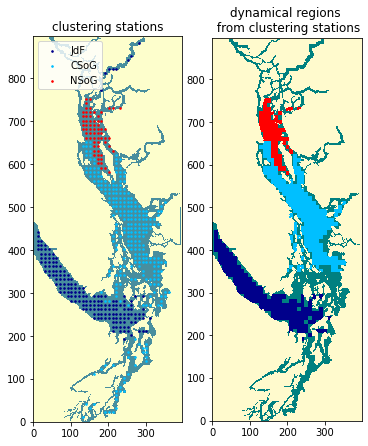

In [3]:
import matplotlib.colors as colors

fact = 1
fig = plt.figure(figsize=(9.1*fact, 7.09*fact))
ax = plt.subplot2grid((3,3), (0,1), colspan=1, rowspan=3)
#ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)    

cmap = colors.ListedColormap(['lemonchiffon','teal','chartreuse','deepskyblue','red','darkblue'])
boundaries = [0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
w = plt.pcolormesh(regmask, cmap=cmap, norm=norm)
#plt.colorbar(w)
ax.set_title('dynamical regions \n from clustering stations')

ax = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
ts = 10
mesh = ax.pcolormesh(tmask, vmin=0, vmax=2, cmap = cm.cm.deep)
pts = ax.scatter(xs_jdf,ys_jdf,\
                 s=ts,c='darkblue',marker='.', label = 'JdF')
pts = ax.scatter(xs_csog,ys_csog,\
                 s=ts,c='deepskyblue',marker='.', label = 'CSoG')
pts = ax.scatter(xs_nsog,ys_nsog,\
                 s=ts,c='red',marker='.', label = 'NSoG')
ax.set_title('clustering stations')
plt.legend()

In [4]:
tcl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/BIO_clno_5_2015_reass.pkl'
xs_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Xcoords_for571_stations.pkl'
ys_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Ycoords_for571_stations.pkl'

cldes = pickle.load(open(tcl, 'rb'))
xs = pickle.load(open(xs_pkl, 'rb'))
ys = pickle.load(open(ys_pkl, 'rb'))

ys_csog = ys[cldes == 3]
xs_csog = xs[cldes == 3]

ys_nsog = ys[cldes == 4]
xs_nsog = xs[cldes == 4]

ys_jdf = ys[cldes == 5]
xs_jdf = xs[cldes == 5]

bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
# print(grid)
# print(grid['gdept_1d'][0,26])
tmask = (grid['tmask'][0,0,:,:])
regmask = np.copy(tmask)
tmask_24 = (grid['tmask'][0,24,:,:])
regmask_24 = np.copy(tmask)
tmask_26 = (grid['tmask'][0,26,:,:])
regmask_26 = np.copy(tmask)

for i in range(0,len(ys_csog)):
    tx = xs_csog[i]
    ty = ys_csog[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 3
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 3
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 3
for i in range(0,len(ys_nsog)):
    tx = xs_nsog[i]
    ty = ys_nsog[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 4
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 4
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 4
for i in range(0,len(ys_jdf)):
    tx = xs_jdf[i]
    ty = ys_jdf[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 5
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 5
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 5

regmask[tmask==0] = 0
regmask_24[tmask_24==0] = 0
regmask_26[tmask_26==0] = 0

## adjust your regmask

xs = np.zeros([898,398])
ys = np.zeros([898,398])

for i in range(0,398):
    xs[:,i] = i
for j in range(0,898):
    ys[j,:] = j
    
regmask[(regmask == 5) & (ys > 700)] = 1
regmask[(regmask == 5) & (xs < 20)] = 1
regmask[(regmask == 3) & (ys < 225)] = 1
regmask[(regmask == 3) & (ys < 350) & (xs < 290)] = 1
regmask[(regmask == 3) & (ys < 350) & (xs > 290)] = 1
regmask[(regmask == 3) & (ys < 300) & (xs > 280) & (xs < 320)] = 1

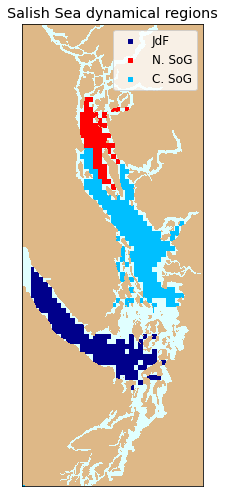

In [5]:
import matplotlib.colors as colors
ts =10
fact = 1.2

#rcparams
plt.rcParams.update({'font.size':12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

fig = plt.figure(figsize=(9.1*fact, 7.09*fact))
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=3)
#ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)    

cmap = colors.ListedColormap(['burlywood','lightcyan','chartreuse','deepskyblue','red','darkblue'])
boundaries = [0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
w = plt.pcolormesh(regmask, cmap=cmap, norm=norm, alpha = 1)

ax.scatter(-1,-1, marker = 's', s=ts,c='darkblue', label = 'JdF')
ax.scatter(-1,-1, marker = 's', s=ts,c='red', label = 'N. SoG')
ax.scatter(-1,-1, marker = 's', s=ts,c='deepskyblue', label = 'C. SoG')
#plt.colorbar(w)
ax.set_title('Salish Sea dynamical regions')
ax.set_xlim([0,398])
ax.set_ylim([0,898])
ax.set_xticks([])
ax.set_yticks([])
# ax = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
# ts = 10
# mesh = ax.pcolormesh(tmask, vmin=0, vmax=2, cmap = cm.cm.deep)
# pts = ax.scatter(xs_jdf,ys_jdf,\
#                  s=ts,c='darkblue',marker='.', label = 'JdF')
# pts = ax.scatter(xs_csog,ys_csog,\
#                  s=ts,c='deepskyblue',marker='.', label = 'CSoG')
# pts = ax.scatter(xs_nsog,ys_nsog,\
#                  s=ts,c='red',marker='.', label = 'NSoG')
# ax.set_title('clustering stations')
plt.legend()

In [6]:
# load a day of AS flux and sort by type, 1.11 for asselin filter
sec_day = 60*60*24 #CONVERT FROM MMOL/M2/SEC TO MMOL/M2/DAY

hindcast2013_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2013.pkl', 'rb'))  * sec_day * 1.11
hindcast2014_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2014.pkl', 'rb'))  * sec_day * 1.11
hindcast2015_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2015.pkl', 'rb'))  * sec_day * 1.11
hindcast2016_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2016.pkl', 'rb'))  * sec_day * 1.11
hindcast2017_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2017.pkl', 'rb'))  * sec_day * 1.11

#csize = cellsize_alg2.pkl

csize = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/cellsize_alg2.pkl', 'rb'))#  * sec_day * 1.11


In [7]:
csize_surf = csize[0,:,:]
csize_surf[np.isnan(csize_surf)] = 0
print(np.min(csize_surf))

csize_broad = np.zeros([365,898,398])
regmask_broad = np.zeros([365,898,398])
for i in range(0,365):
    regmask_broad[i,:,:] = regmask
    csize_broad[i,:,:] = csize_surf

0.0


In [8]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [9]:
np.shape(hindcast2013_co2_flx)

#year, day, region, max, min, mean, percentile10, percentile90

fluxstats = np.zeros([5,365,3,5])

tyrs = [hindcast2013_co2_flx, hindcast2014_co2_flx, hindcast2015_co2_flx, \
        hindcast2016_co2_flx[0:365,:,:], hindcast2017_co2_flx]
test_one = hindcast2013_co2_flx[0,:,:]


import time
w = time.time()
for y in range(0,5):
    tyr = tyrs[y]
    
    for d in range(0,365):
        test_one = tyr[d,:,:]
        for r in range(3,6):
            treg = test_one[regmask == r]
            fluxstats[y,d,r-3,0] = np.nanmax(treg)
            fluxstats[y,d,r-3,1] = np.nanmin(treg)
            fluxstats[y,d,r-3,2] = np.average(treg, weights = csize_surf[regmask == r])
            fluxstats[y,d,r-3,3] = weighted_quantile(treg, 0.1, sample_weight=csize_surf[regmask == r], 
                      values_sorted=False, old_style=False)
            fluxstats[y,d,r-3,4] = weighted_quantile(treg, 0.9, sample_weight=csize_surf[regmask == r], 
                      values_sorted=False, old_style=False)
       
print(time.time()-w) 
    
#per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)

16.46458649635315


In [10]:
m_s = np.array([0,31,59,90,120,151,181,212,243,273,304,334])
m_e = np.array([31,59,90,120,151,181,212,243,273,304,334,364]) +1

tyrs = [hindcast2013_co2_flx, hindcast2014_co2_flx, hindcast2015_co2_flx, \
        hindcast2016_co2_flx[0:365,:,:], hindcast2017_co2_flx]

fluxstats_monthly = np.zeros([5,12,3,5])
fluxstats_yearly = np.zeros([5,3,5])

import time
w = time.time()
for y in range(0,5):
    tyr = tyrs[y]
    
    for d in range(0,12):
        for r in range(3,6):
            tstats = fluxstats[y,m_s[d]:m_e[d],r-3,:]
            fluxstats_monthly[y,d,r-3,0] = np.nanmax(tstats[:,0])
            fluxstats_monthly[y,d,r-3,1] = np.nanmin(tstats[:,1])
            fluxstats_monthly[y,d,r-3,2] = np.nanmean(tstats[:,2])
            fluxstats_monthly[y,d,r-3,3] = np.nanmean(tstats[:,3])
            fluxstats_monthly[y,d,r-3,4] = np.nanmean(tstats[:,4])
            
    for r in range(3,6):
        test_one = tyr[:,:,:]
        tdat = test_one[regmask_broad == r]
        tweights = csize_broad[regmask_broad == r]
        tdat = tdat[tdat<1e10]
        tweights = tweights[tdat<1e10]
        fluxstats_yearly[y,r-3,0] = np.nanmax(tdat)
        fluxstats_yearly[y,r-3,1] = np.nanmin(tdat)
        fluxstats_yearly[y,r-3,2] = np.average(tdat, weights = tweights)
        fluxstats_yearly[y,r-3,3] = weighted_quantile(tdat, 0.1, sample_weight=tweights, 
                  values_sorted=False, old_style=False)
        fluxstats_yearly[y,r-3,4] = weighted_quantile(tdat, 0.9, sample_weight=tweights, 
                  values_sorted=False, old_style=False)
       
print(time.time()-w) 


24.834043979644775


In [11]:
asymmetric_error = np.zeros([2,1])

(0.7, 6.0)

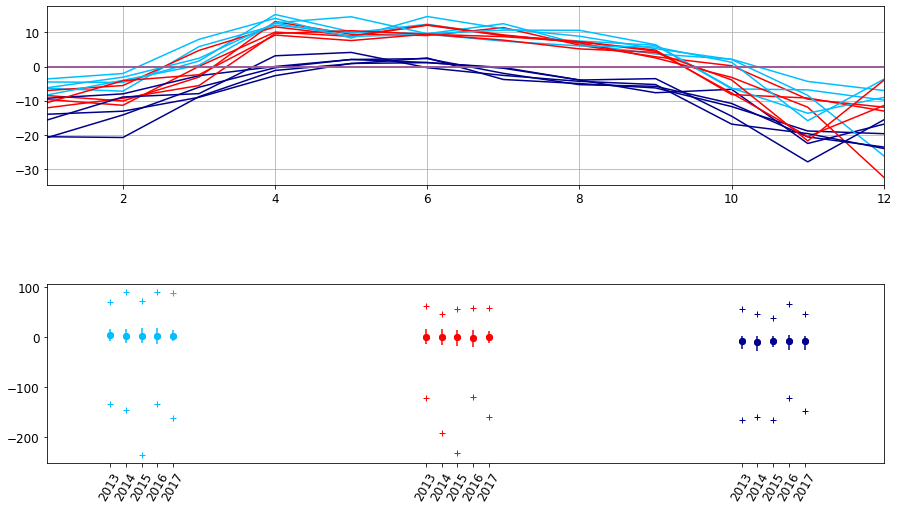

In [12]:
mons = np.arange(1,13,1)
fact = 0.6

cols = ['deepskyblue','red','darkblue']
labs = ['C.SoG', 'N.SoG', 'JdF']
fig, axs = plt.subplots(2,1, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

for y in range(0,5):
    for r in range(0,3):
        axs[0].plot(mons,fluxstats_monthly[y,:,r,2], color = cols[r])
        axs[0].plot(mons, np.zeros_like(mons))
        axs[0].grid()
        axs[0].set_xlim([1,12])

for y in range(0,5):
    for r in range(0,3):
        axs[1].plot(1.1+r*2+y*0.1,fluxstats_yearly[y,r-3,2], color = cols[r], marker = 'o')
        tx = 1.1+r*2+y*0.1
        ty = fluxstats_yearly[y,r-3,2]
#         asymmetric_error = np.zeros([2,1])
        asymmetric_error[0] = ty - fluxstats_yearly[y,r-3,3]
        asymmetric_error[1] =  fluxstats_yearly[y,r-3,4] - ty
        axs[1].errorbar(tx,ty,\
                    yerr = asymmetric_error, color = cols[r], marker = 'o')
        
        axs[1].plot(tx,fluxstats_yearly[y,r-3,0],'+', color = cols[r])
        axs[1].plot(tx,fluxstats_yearly[y,r-3,1],'+', color = cols[r])
        
axs[1].set_xticks([1.1,1.2,1.3,1.4,1.5,3.1,3.2,3.3,3.4,3.5,5.1,5.2,5.3,5.4,5.5])
axs[1].set_xticklabels(['2013','2014','2015','2016','2017','2013',\
                        '2014','2015','2016','2017','2013','2014','2015','2016','2017'], rotation = 60)
axs[1].set_xlim([0.7,6])        


### get daily mean air-sea pco2 

In [13]:
# hindcast2017_co2_flx
np.shape(hindcast2017_co2_flx)
# [regmask == r]

daily_mean_2017 = np.zeros([365,3])

for i in range(0,365):
    for r in range(3,6):
        tday = hindcast2017_co2_flx[i,:,:]
        tflux = np.nanmean(tday[regmask == r])
        daily_mean_2017[i,r-3] = tflux
        
        
np.shape(hindcast2017_co2_flx)
# [regmask == r]



(365, 898, 398)

Text(0.5, 1.0, 'c) Annual mean surface ocean air-sea CO$_2$ flux for years 2013-2017, by region \n 10th-90th percentile of distribution shown')

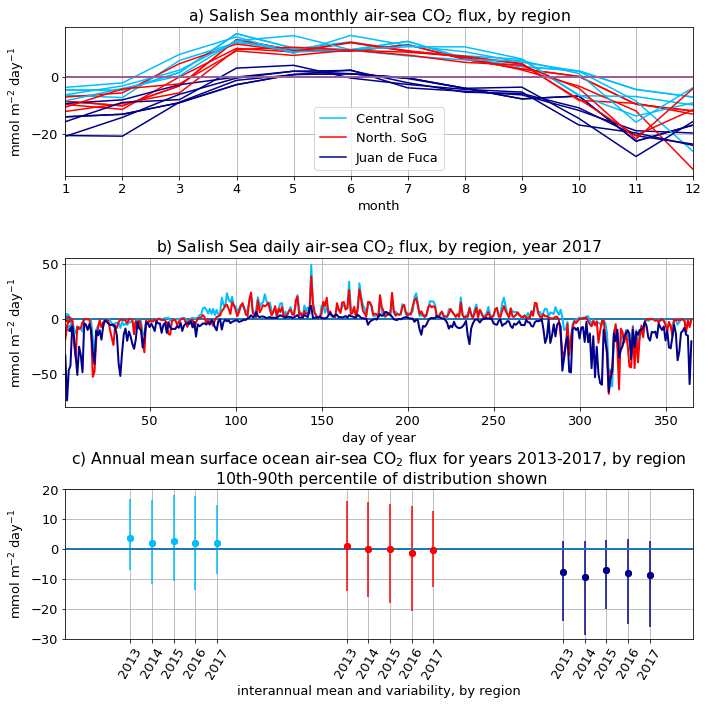

In [14]:
plt.rcParams.update({'font.size': 13})
mons = np.arange(1,13,1)
fact = 0.45

fig, axs = plt.subplots(3,1, figsize=(25*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

labs = ['Central SoG', 'North. SoG', 'Juan de Fuca']

for y in range(0,5):
    for r in range(0,3):
        axs[0].plot(mons,fluxstats_monthly[y,:,r,2], color = cols[r])
        axs[0].plot(mons, np.zeros_like(mons))
        axs[0].grid()
        axs[0].set_xlim([1,12])
        axs[0].set_xticks(np.arange(1,13,1))
        if y == 0:
            axs[0].plot(mons,fluxstats_monthly[y,:,r,2], color = cols[r], label = labs[r])

for y in range(0,5):
    for r in range(0,3):
        axs[2].plot(1.1+r+y*0.1,fluxstats_yearly[y,r-3,2], color = cols[r], marker = 'o')
        tx = 1.1+r+y*0.1
        ty = fluxstats_yearly[y,r-3,2]
        asymmetric_error = np.zeros([2,1])
        asymmetric_error[0] = ty - fluxstats_yearly[y,r-3,3]
        asymmetric_error[1] =  fluxstats_yearly[y,r-3,4] - ty
        axs[2].errorbar(tx,ty,\
                    yerr = asymmetric_error, color = cols[r], marker = 'o')
        axs[2].grid()
        axs[2].axhline(y=0)
#         axs[2].plot(tx,fluxstats_yearly[y,r-3,0],'+', color = cols[r])
#         axs[2].plot(tx,fluxstats_yearly[y,r-3,1],'+', color = cols[r])

for r in range(0,3):
    axs[1].plot(1.1+r+y*0.1,fluxstats_yearly[y,r-3,2], color = cols[r], marker = 'o')
    tx = 1.1+r+y*0.1
    ty = fluxstats_yearly[y,r-3,2]

#         asymmetric_error[0] = ty - fluxstats_yearly[y,r-3,3]
#         asymmetric_error[2] =  fluxstats_yearly[y,r-3,4] - ty
#         axs[1].errorbar(tx,ty,\
#                     yerr = asymmetric_error, color = cols[r], marker = 'o')
    axs[1].grid()
    axs[1].axhline(y=0)
    
axs[2].set_xticks([1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,3.1,3.2,3.3,3.4,3.5])
axs[2].set_xticklabels(['2013','2014','2015','2016','2017','2013',\
                        '2014','2015','2016','2017','2013','2014','2015','2016','2017'], rotation = 60)
axs[2].set_xlim([0.8,3.7])        


axs[0].set_xlabel('month')
axs[2].set_xlabel('interannual mean and variability, by region')
axs[0].set_ylabel('mmol m$^{-2}$ day$^{-1}$')
axs[2].set_ylabel('mmol m$^{-2}$ day$^{-1}$')
axs[1].set_ylabel('mmol m$^{-2}$ day$^{-1}$')
axs[0].legend()

for r in range(0,3):
    axs[1].plot(np.arange(1,366,1),daily_mean_2017[:,r], color = cols[r], linewidth = 2)
    axs[1].set_xlim([1,366])
axs[1].set_xlabel('day of year')

axs[2].set_ylim([-30,20])
axs[0].set_title('a) Salish Sea monthly air-sea CO$_2$ flux, by region')
axs[1].set_title('b) Salish Sea daily air-sea CO$_2$ flux, by region, year 2017')
axs[2].set_title('c) Annual mean surface ocean air-sea CO$_2$ flux for years 2013-2017, by region \n 10th-90th percentile of distribution shown')

(12, 3)
(12, 3)
(12, 3)
(12, 3)
(12, 3)
(12, 3)


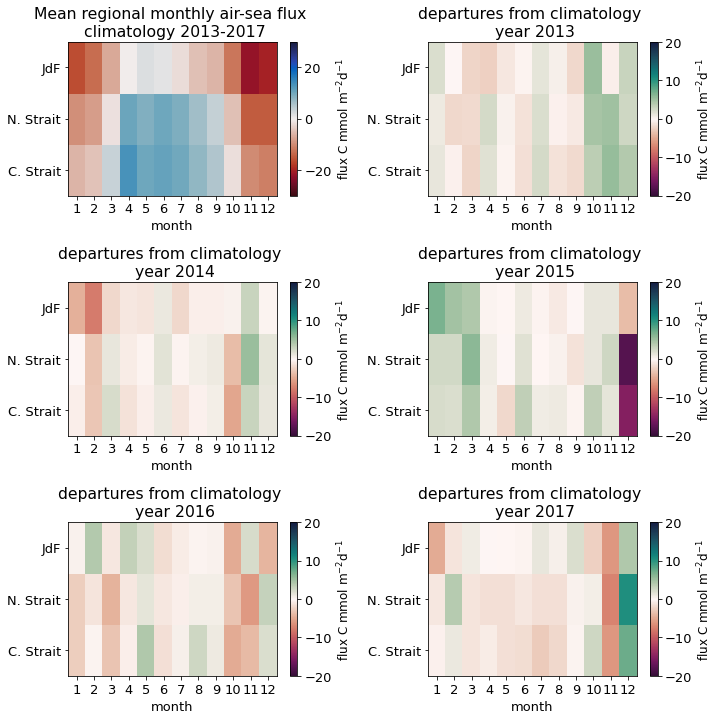

In [15]:
fact = 0.6
fig, axs = plt.subplots(3,2, figsize=( 17*fact, 17*fact,), facecolor='w', edgecolor='k')
axs = axs.ravel()


section_slice = np.arange(1,13,1)
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
regs = np.arange(0,3,1)

ax1 = axs[0]
tdat = np.nanmean(fluxstats_monthly[:,:,:,2],axis=0)
print(np.shape(tdat))
ax1.set_yticks([0.5,1.5,2.5]); ax1.set_yticklabels(['C. Strait','N. Strait', 'JdF'])
ax1.set_xticks(np.arange(0.5,12.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(tdat.T, 
                       cmap = cm.cm.balance_r, vmin = -30, vmax = 30)
cbar = plt.colorbar(mesh, ax = ax1); ax1.set_xlabel('month')
ax1.set_title('Mean regional monthly air-sea flux \n climatology 2013-2017')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)


for i in range(0,5):
    ax1 = axs[i+1]
    yr = 2013+i
    tdat = (fluxstats_monthly[i,:,:,2]) - np.nanmean(fluxstats_monthly[:,:,:,2],axis=0)
    print(np.shape(tdat))
    ax1.set_yticks([0.5,1.5,2.5]); ax1.set_yticklabels(['C. Strait','N. Strait', 'JdF'])
    ax1.set_xticks(np.arange(0.5,12.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
    mesh = ax1.pcolormesh(tdat.T, 
                           cmap = cm.cm.curl_r, vmin = -20, vmax = 20)
    cbar = plt.colorbar(mesh, ax = ax1); ax1.set_xlabel('month')
    ax1.set_title(f'departures from climatology \n year {yr}')
    cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)


plt.tight_layout()

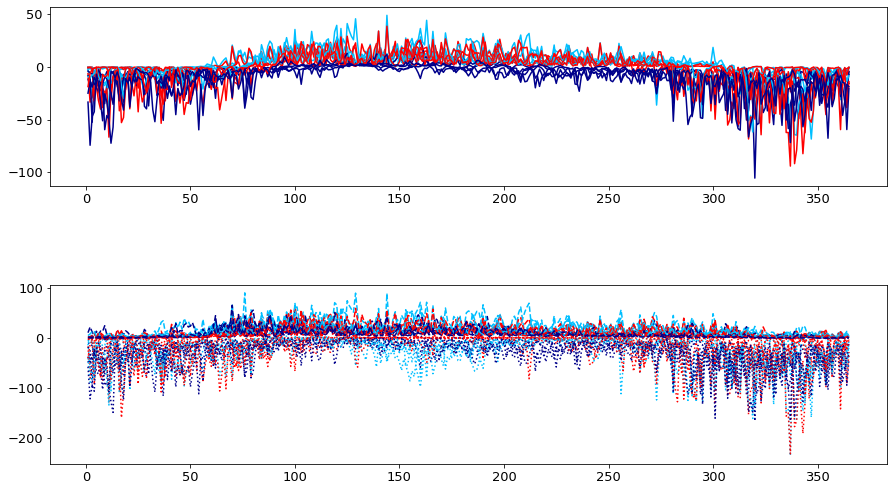

In [16]:
daze = np.arange(1,366,1)
fact = 0.6

fig, axs = plt.subplots(2,1, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

cols = ['deepskyblue','red','darkblue']

for y in range(0,5):
    for r in range(0,3):
        axs[0].plot(daze,fluxstats[y,:,r,2], color = cols[r])
        
        
        axs[1].plot(daze,fluxstats[y,:,r,0], color = cols[r], linestyle = '--')
        axs[1].plot(daze,fluxstats[y,:,r,1], color = cols[r], linestyle = ':')

## pco2 

In [17]:
## 

# pco2_2017 = np.zeros([365,898,398])

# start = '2017-01-01'
# end = '2017-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_pco2 = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_pco2))
#     pco2_2017[i,:,:] = q['model_output']['pCO2'][:]

# pickle.dump(pco2_2017, open("pco2_2017.pkl", 'wb'))

# pco2_2013 = np.zeros([365,898,398])

# start = '2013-01-01'
# end = '2013-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_pco2 = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_pco2))
#     pco2_2013[i,:,:] = q['model_output']['pCO2'][:]

# pickle.dump(pco2_2013, open("pco2_2013.pkl", 'wb'))

# pco2_2014 = np.zeros([365,898,398])

# start = '2014-01-01'
# end = '2014-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_pco2 = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_pco2))
#     pco2_2014[i,:,:] = q['model_output']['pCO2'][:]

# pickle.dump(pco2_2014, open("pco2_2014.pkl", 'wb'))

# pco2_2015 = np.zeros([365,898,398])

# start = '2015-01-01'
# end = '2015-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_pco2 = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_pco2))
#     pco2_2015[i,:,:] = q['model_output']['pCO2'][:]

# pickle.dump(pco2_2015, open("pco2_2015.pkl", 'wb'))


# pco2_2016 = np.zeros([365,898,398])

# start = '2016-01-01'
# end = '2016-12-30'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_pco2 = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_pco2))
#     pco2_2016[i,:,:] = q['model_output']['pCO2'][:]

# pickle.dump(pco2_2016, open("pco2_2016.pkl", 'wb'))

In [18]:
hindcast2013_pco2 = pickle.load(open('pco2_2013.pkl', 'rb'))  
hindcast2014_pco2 = pickle.load(open('pco2_2014.pkl', 'rb'))  
hindcast2015_pco2 = pickle.load(open('pco2_2015.pkl', 'rb'))  
#hindcast2016_pco2 = pickle.load(open('pco2_2016.pkl', 'rb'))  
hindcast2017_pco2 = pickle.load(open('pco2_2017.pkl', 'rb'))  

#csize = cellsize_alg2.pkl

csize = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/cellsize_alg2.pkl', 'rb'))#  


In [19]:
daily_pco2mean_2017 = np.zeros([365,3])

for i in range(0,365):
    for r in range(3,6):
        tday = hindcast2017_pco2[i,:,:]
        tflux = np.nanmean(tday[regmask == r])
        daily_pco2mean_2017[i,r-3] = tflux

In [20]:
np.shape(hindcast2013_pco2)

#year, day, region, max, min, mean, percentile10, percentile90

pco2stats = np.zeros([5,365,3,5])

tyrs = [hindcast2013_pco2, hindcast2014_pco2, hindcast2015_pco2, \
        hindcast2017_pco2, hindcast2017_pco2]
test_one = hindcast2013_pco2[0,:,:]


import time
w = time.time()
for y in range(0,5):
    tyr = tyrs[y]
    
    for d in range(0,365):
        test_one = tyr[d,:,:]
        for r in range(3,6):
            treg = test_one[regmask == r]
            pco2stats[y,d,r-3,0] = np.nanmax(treg)
            pco2stats[y,d,r-3,1] = np.nanmin(treg)
            pco2stats[y,d,r-3,2] = np.average(treg, weights = csize_surf[regmask == r])
            pco2stats[y,d,r-3,3] = weighted_quantile(treg, 0.1, sample_weight=csize_surf[regmask == r], 
                      values_sorted=False, old_style=False)
            pco2stats[y,d,r-3,4] = weighted_quantile(treg, 0.9, sample_weight=csize_surf[regmask == r], 
                      values_sorted=False, old_style=False)
       
print(time.time()-w) 
    
#per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)

16.697301387786865


In [21]:
m_s = np.array([0,31,59,90,120,151,181,212,243,273,304,334])
m_e = np.array([31,59,90,120,151,181,212,243,273,304,334,364]) +1

tyrs = [hindcast2013_pco2, hindcast2014_pco2, hindcast2015_pco2, \
        hindcast2017_pco2, hindcast2017_pco2]

pco2stats_monthly = np.zeros([5,12,3,5])
pco2stats_yearly = np.zeros([5,3,5])

import time
w = time.time()
for y in range(0,5):
    tyr = tyrs[y]
    
    for d in range(0,12):
        for r in range(3,6):
            tstats = pco2stats[y,m_s[d]:m_e[d],r-3,:]
            pco2stats_monthly[y,d,r-3,0] = np.nanmax(tstats[:,0])
            pco2stats_monthly[y,d,r-3,1] = np.nanmin(tstats[:,1])
            pco2stats_monthly[y,d,r-3,2] = np.nanmean(tstats[:,2])
            pco2stats_monthly[y,d,r-3,3] = np.nanmean(tstats[:,3])
            pco2stats_monthly[y,d,r-3,4] = np.nanmean(tstats[:,4])
            
    for r in range(3,6):
        test_one = tyr[:,:,:]
        tdat = test_one[regmask_broad == r]
        tweights = csize_broad[regmask_broad == r]
        tdat = tdat[tdat<1e10]
        tweights = tweights[tdat<1e10]
        pco2stats_yearly[y,r-3,0] = np.nanmax(tdat)
        pco2stats_yearly[y,r-3,1] = np.nanmin(tdat)
        pco2stats_yearly[y,r-3,2] = np.average(tdat, weights = tweights)
        pco2stats_yearly[y,r-3,3] = weighted_quantile(tdat, 0.1, sample_weight=tweights, 
                  values_sorted=False, old_style=False)
        pco2stats_yearly[y,r-3,4] = weighted_quantile(tdat, 0.9, sample_weight=tweights, 
                  values_sorted=False, old_style=False)
       
print(time.time()-w) 


28.127805948257446


Text(0.5, 1.0, 'c) Annual mean surface ocean pCO$_2$ for years 2013-2017, by region \n 10th-90th percentile of distribution shown')

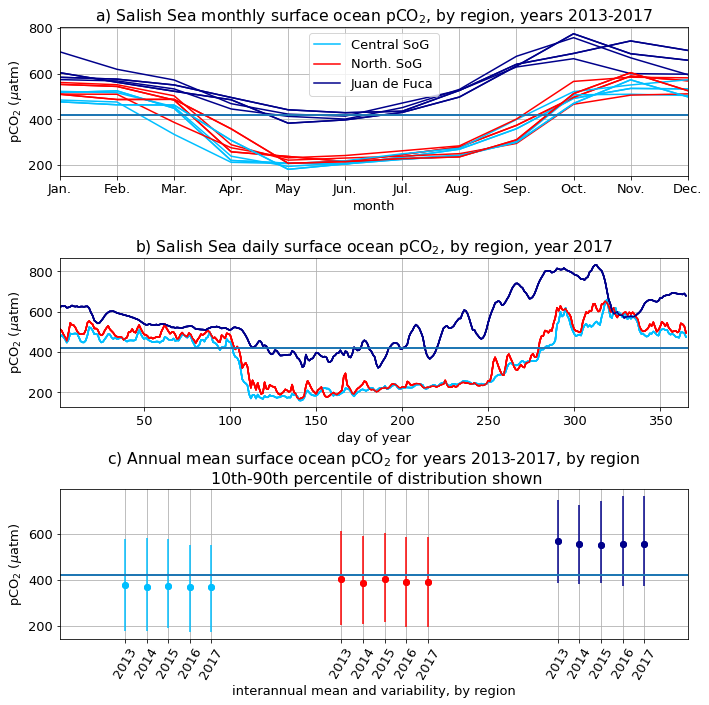

In [22]:
plt.rcParams.update({'font.size': 13})
mons = np.arange(1,13,1)
fact = 0.45

fig, axs = plt.subplots(3,1, figsize=(25*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)
labs = ['Central SoG', 'North. SoG', 'Juan de Fuca']

for y in range(0,5):
    for r in range(0,3):
        axs[0].plot(mons,pco2stats_monthly[y,:,r,2], color = cols[r])
        axs[0].grid()
        axs[0].set_xlim([1,12])
        axs[0].set_xticks(np.arange(1,13,1))
        axs[0].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'])
        if y == 0:
            axs[0].plot(mons,pco2stats_monthly[y,:,r,2], color = cols[r], label = labs[r])
for y in range(0,5):
    for r in range(0,3):
        axs[2].plot(1.1+r+y*0.1,pco2stats_yearly[y,r-3,2], color = cols[r], marker = 'o')
        tx = 1.1+r+y*0.1
        ty = pco2stats_yearly[y,r-3,2]

        asymmetric_error[0] = ty - pco2stats_yearly[y,r-3,3]
        asymmetric_error[1] =  pco2stats_yearly[y,r-3,4] - ty
        axs[2].errorbar(tx,ty,\
                    yerr = asymmetric_error, color = cols[r], marker = 'o')
        axs[2].grid()
        axs[1].plot(np.arange(1,366,1),daily_pco2mean_2017[:,r-3], color = cols[r])
        axs[1].grid()
        axs[1].set_xlim([1,366])
        axs[1].axhline(y=420)
        axs[0].axhline(y=420)
        axs[2].axhline(y=420)
#         axs[2].plot(tx,pco2stats_yearly[y,r-3,0],'+', color = cols[r])
#         axs[2].plot(tx,pco2stats_yearly[y,r-3,1],'+', color = cols[r])
        
    
axs[2].set_xticks([1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,3.1,3.2,3.3,3.4,3.5])
axs[2].set_xticklabels(['2013','2014','2015','2016','2017','2013',\
                        '2014','2015','2016','2017','2013','2014','2015','2016','2017'], rotation = 60)
axs[2].set_xlim([0.8,3.7])   


axs[0].set_xlabel('month')
axs[1].set_xlabel('day of year')
axs[2].set_xlabel('interannual mean and variability, by region')
axs[0].set_ylabel('pCO$_2$ ($\mu$atm)')
axs[1].set_ylabel('pCO$_2$ ($\mu$atm)')
axs[2].set_ylabel('pCO$_2$ ($\mu$atm)')
axs[0].legend()

axs[0].set_title('a) Salish Sea monthly surface ocean pCO$_2$, by region, years 2013-2017')
axs[1].set_title('b) Salish Sea daily surface ocean pCO$_2$, by region, year 2017')
axs[2].set_title('c) Annual mean surface ocean pCO$_2$ for years 2013-2017, by region \n 10th-90th percentile of distribution shown')

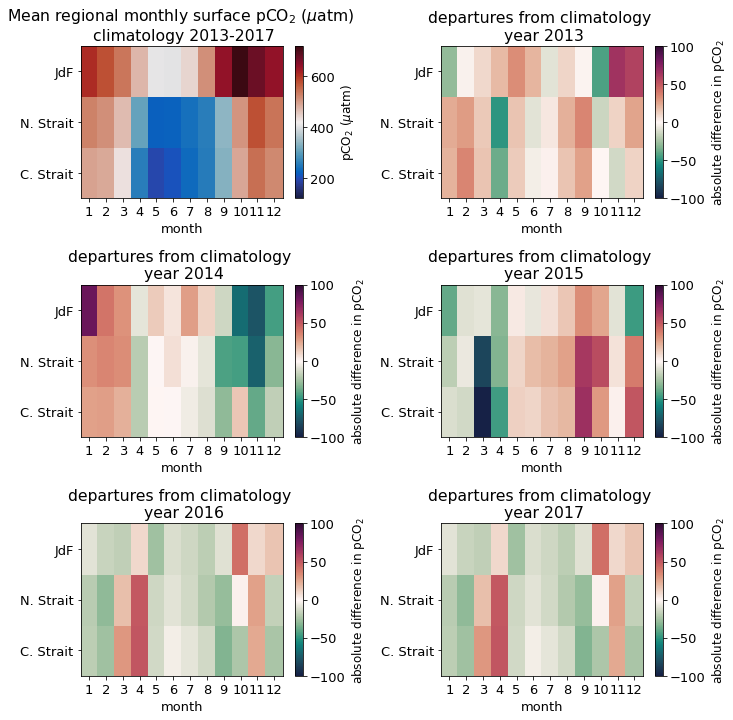

In [23]:
fact = 0.6
fig, axs = plt.subplots(3,2, figsize=( 17*fact, 17*fact,), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmin = -150
tmax = 150

section_slice = np.arange(1,13,1)
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
regs = np.arange(0,3,1)

ax1 = axs[0]
tdat = np.nanmean(pco2stats_monthly[:,:,:,2],axis=0)

ax1.set_yticks([0.5,1.5,2.5]); ax1.set_yticklabels(['C. Strait','N. Strait', 'JdF'])
ax1.set_xticks(np.arange(0.5,12.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(tdat.T, 
                       cmap = cm.cm.balance, vmin = 420-300, vmax = 420+300)
cbar = plt.colorbar(mesh, ax = ax1); ax1.set_xlabel('month')
ax1.set_title('Mean regional monthly surface pCO$_2$ ($\mu$atm) \n climatology 2013-2017')
cbar.set_label('pCO$_2$ ($\mu$atm)', fontsize = 12)


for i in range(0,5):
    ax1 = axs[i+1]
    yr = 2013+i
    tdat = ((pco2stats_monthly[i,:,:,2]) - np.nanmean(pco2stats_monthly[:,:,:,2],axis=0))

    ax1.set_yticks([0.5,1.5,2.5]); ax1.set_yticklabels(['C. Strait','N. Strait', 'JdF'])
    ax1.set_xticks(np.arange(0.5,12.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
    mesh = ax1.pcolormesh(tdat.T, 
                           cmap = cm.cm.curl, vmin = -100, vmax = 100)
    cbar = plt.colorbar(mesh, ax = ax1); ax1.set_xlabel('month')
    ax1.set_title(f'departures from climatology \n year {yr}')
    cbar.set_label('absolute difference in pCO$_2$', fontsize = 12)


plt.tight_layout()

In [24]:
# windir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/extraction_scripts/WINDFILES_interp'

# wind_2013 = np.zeros([365,898,398])

# start = '2013-01-01'
# end = '2013-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = windir
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}/windint_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2013[i,:,:] = (q['daily_avg_windmag'][:,:])
# #     wind_2013[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2013, open("wind_2013.pkl", 'wb'))

# windir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/extraction_scripts/WINDFILES_interp'




In [25]:
# wind_2014 = np.zeros([365,898,398])

# start = '2014-01-01'
# end = '2014-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = windir
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}/windint_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2014[i,:,:] = (q['daily_avg_windmag'][:,:])
# #     wind_2014[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2014, open("wind_2014.pkl", 'wb'))

# windir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/extraction_scripts/WINDFILES_interp'

# wind_2015 = np.zeros([365,898,398])

# start = '2015-01-01'
# end = '2015-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = windir
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}/windint_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2015[i,:,:] = (q['daily_avg_windmag'][:,:])
# #     wind_2015[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2015, open("wind_2015.pkl", 'wb'))

# windir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/extraction_scripts/WINDFILES_interp'

# 




In [26]:
# wind_2016 = np.zeros([365,898,398])
# start = '2016-01-01'
# end = '2016-12-30'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = windir
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}/windint_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2016[i,:,:] = (q['daily_avg_windmag'][:,:])
# #     wind_2016[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2016, open("wind_2016.pkl", 'wb'))

In [27]:
wind_2013= pickle.load(open('wind_2013.pkl', 'rb'))  
wind_2014= pickle.load(open('wind_2014.pkl', 'rb'))  
wind_2015= pickle.load(open('wind_2015.pkl', 'rb'))  
wind_2016= pickle.load(open('wind_2016.pkl', 'rb'))  

wind_2013 = wind_2013**2
wind_2014 = wind_2014**2
wind_2015 = wind_2015**2
wind_2016 = wind_2016**2

In [28]:
m_s = np.array([0,31,59,90,120,151,181,212,243,273,304,334])
m_e = np.array([31,59,90,120,151,181,212,243,273,304,334,364]) +1

tyrs = [wind_2013, wind_2014, wind_2015, \
        wind_2016, wind_2016]

windstats_monthly = np.zeros([5,12,3,5])
windstats_yearly = np.zeros([5,3,5])


#year, day, region, max, min, mean, percentile10, percentile90

windstats = np.zeros([5,365,3,5])


import time
w = time.time()
for y in range(0,5):
    tyr = tyrs[y]
    
    for d in range(0,365):
        test_one = tyr[d,:,:]
        for r in range(3,6):
            treg = test_one[regmask == r]
            windstats[y,d,r-3,0] = np.nanmax(treg)
            windstats[y,d,r-3,1] = np.nanmin(treg)
            windstats[y,d,r-3,2] = np.average(treg, weights = csize_surf[regmask == r])
            windstats[y,d,r-3,3] = weighted_quantile(treg, 0.1, sample_weight=csize_surf[regmask == r], 
                      values_sorted=False, old_style=False)
            windstats[y,d,r-3,4] = weighted_quantile(treg, 0.9, sample_weight=csize_surf[regmask == r], 
                      values_sorted=False, old_style=False)
       
print(time.time()-w) 
    
#per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)



import time
w = time.time()
for y in range(0,5):
    tyr = tyrs[y]
    
    for d in range(0,12):
        for r in range(3,6):
            tstats = windstats[y,m_s[d]:m_e[d],r-3,:]
            windstats_monthly[y,d,r-3,0] = np.nanmax(tstats[:,0])
            windstats_monthly[y,d,r-3,1] = np.nanmin(tstats[:,1])
            windstats_monthly[y,d,r-3,2] = np.nanmean(tstats[:,2])
            windstats_monthly[y,d,r-3,3] = np.nanmean(tstats[:,3])
            windstats_monthly[y,d,r-3,4] = np.nanmean(tstats[:,4])
            
    for r in range(3,6):
        test_one = tyr[:,:,:]
        tdat = test_one[regmask_broad == r]
        tweights = csize_broad[regmask_broad == r]
        tdat = tdat[tdat<1e10]
        tweights = tweights[tdat<1e10]
        windstats_yearly[y,r-3,0] = np.nanmax(tdat)
        windstats_yearly[y,r-3,1] = np.nanmin(tdat)
        windstats_yearly[y,r-3,2] = np.average(tdat, weights = tweights)
        windstats_yearly[y,r-3,3] = weighted_quantile(tdat, 0.1, sample_weight=tweights, 
                  values_sorted=False, old_style=False)
        windstats_yearly[y,r-3,4] = weighted_quantile(tdat, 0.9, sample_weight=tweights, 
                  values_sorted=False, old_style=False)
       
print(time.time()-w) 


16.41319179534912
35.75949192047119


In [29]:
print(np.nanmax(wind_2013))

219.58096197128253


(12, 3)
13.405468620833947
43.389374728870685
(12, 3)
(12, 3)
(12, 3)
(12, 3)
(12, 3)


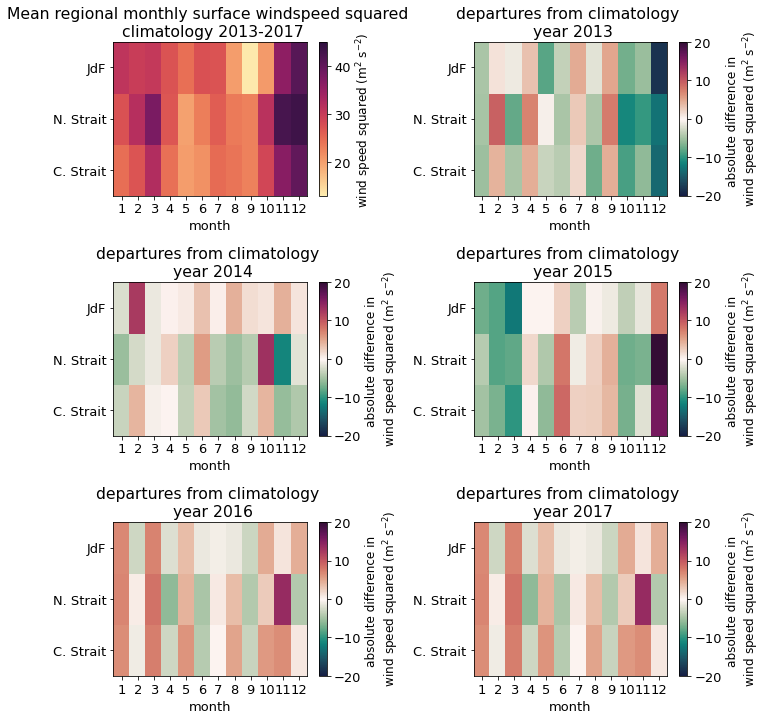

In [30]:
fact = 0.6
fig, axs = plt.subplots(3,2, figsize=( 17*fact, 17*fact,), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmin = -150
tmax = 150

section_slice = np.arange(1,13,1)
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
regs = np.arange(0,3,1)

ax1 = axs[0]
tdat = np.nanmean(windstats_monthly[:,:,:,2],axis=0)
print(np.shape(tdat))
ax1.set_yticks([0.5,1.5,2.5]); ax1.set_yticklabels(['C. Strait','N. Strait', 'JdF'])
ax1.set_xticks(np.arange(0.5,12.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
print(np.nanmin(tdat))
print(np.nanmax(tdat))
mesh = ax1.pcolormesh(tdat.T, 
                       cmap = cm.cm.matter, vmin = 13, vmax = 45)
cbar = plt.colorbar(mesh, ax = ax1); ax1.set_xlabel('month')
ax1.set_title('Mean regional monthly surface windspeed squared \n climatology 2013-2017')
cbar.set_label('wind speed squared (m$^2$ s$^{-2}$) ', fontsize = 12)


for i in range(0,5):
    ax1 = axs[i+1]
    yr = 2013+i
    tdat = ((windstats_monthly[i,:,:,2]) - np.nanmean(windstats_monthly[:,:,:,2],axis=0))
    print(np.shape(tdat))
    ax1.set_yticks([0.5,1.5,2.5]); ax1.set_yticklabels(['C. Strait','N. Strait', 'JdF'])
    ax1.set_xticks(np.arange(0.5,12.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
    mesh = ax1.pcolormesh(tdat.T, 
                           cmap = cm.cm.curl, vmin = -20, vmax = 20)
    cbar = plt.colorbar(mesh, ax = ax1); ax1.set_xlabel('month')
    ax1.set_title(f'departures from climatology \n year {yr}')
    cbar.set_label('absolute difference in \n wind speed squared (m$^2$ s$^{-2}$) ', fontsize = 12)


plt.tight_layout()

In [31]:
# wind_2017 = np.zeros([365,898,398])

# start = '2017-01-01'
# end = '2017-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-wind/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2017[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2017, open("wind_2017.pkl", 'wb'))

# wind_2013 = np.zeros([365,898,398])



# wind_2014 = np.zeros([365,898,398])

# start = '2014-01-01'
# end = '2014-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-wind/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2014[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2014, open("wind_2014.pkl", 'wb'))

# wind_2015 = np.zeros([365,898,398])

# start = '2015-01-01'
# end = '2015-12-31'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-wind/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2015[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2015, open("wind_2015.pkl", 'wb'))


# wind_2016 = np.zeros([365,898,398])

# start = '2016-01-01'
# end = '2016-12-30'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-wind/'
#     ymd = tdate.format('YYYYMMDD')
#     nc_wind = f'{tdir}OmA_plus_' + ymd +'.nc'
#     q = (nc.Dataset(nc_wind))
#     wind_2016[i,:,:] = q['model_output']['wind'][:]

# pickle.dump(wind_2016, open("wind_2016.pkl", 'wb'))